In [ ]:
pip install langgraph langchain-openai langchain-groq arxiv wikipedia langchain_community

In [ ]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage, AIMessage,AnyMessage

In [ ]:
api_wrap = ArxivAPIWrapper(top_k_results = 3,doc_content_chars_max = 4000)
Arxiv = ArxivQueryRun(api_wrapper=api_wrap)
print(Arxiv.name)

arxiv


In [ ]:
Arxiv.invoke("Attention all you need")

'Published: 2024-07-22\nTitle: Attention Is All You Need But You Don\'t Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\

In [ ]:
api_wrap = WikipediaAPIWrapper(top_k_results = 3,doc_content_chars_max = 4000)
Wiki = WikipediaQueryRun(api_wrapper=api_wrap)
print(Wiki.name)

wikipedia


In [ ]:
Wiki.invoke("Attention all you need")

'Page: Attention Is All You Need\nSummary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wide variety of AI, such as large language models. At the time, the focus of the research was on improving Seq2seq techniques for machine translation, but the authors go further in the paper, foreseeing the technique\'s potential for other tasks like question answering and what is now known as multimodal generative AI.\nThe paper\'s title is a reference to the song "All You Need Is Love" by the Beatles. The name "Transformer" was picked because Jakob Uszkoreit, one of the paper\'s authors, liked

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "syour api key"
os.environ["GROQ_API_KEY"] = "your api key"
os.environ["TAVILY_API_KEY"] = "your api key"

In [ ]:
tavily = TavilySearchResults()

In [ ]:
tavily.invoke("what is deep learning")

[{'title': 'What is Deep Learning? | Google Cloud',
  'url': 'https://cloud.google.com/discover/what-is-deep-learning',
  'content': 'What is Deep Learning? | Google Cloud\n\nPage Contents\n\n   Topics\n\n   Deep learning\n\nWhat is Deep Learning?\n\nDeep learning is a type of machine learning that uses artificial neural networks to learn from data, similar to the way we learn. Artificial neural networks are inspired by the human brain, and they can be used to solve a wide variety of problems, including image recognition, natural language processing, and speech recognition.',
  'score': 0.93131906},
 {'title': 'What Is Deep Learning? | IBM',
  'url': 'https://www.ibm.com/think/topics/deep-learning',
  'content': '# What is deep learning?\n\n## Author\n\nDave Bergmann \n\nSenior Staff Writer, AI Models\n\nIBM Think\n\n## What is deep learning?\n\nDeep learning is a subset of machine learning driven by multilayered neural networks whose design is inspired by the structure of the human br

In [ ]:
tools = [Arxiv, Wiki,tavily]

In [ ]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model = "qwen/qwen3-32b")

llm_bind_tools = llm_groq.bind_tools(tools)

In [ ]:
llm_bind_tools.invoke([HumanMessage(content = f"Attention all you need")]).tool_calls

[{'name': 'arxiv',
  'args': {'query': 'Attention Is All You Need'},
  'id': '7t115ykmp',
  'type': 'tool_call'}]

In [ ]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [ ]:
class State(TypedDict):
  messages : Annotated[list[AnyMessage], add_messages]

In [45]:
def tool_llm(state :State):
  return {"messages" : [llm_bind_tools.invoke(state["messages"])]}

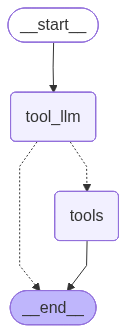

In [46]:
graph = StateGraph(State)

graph.add_node("tool_llm", tool_llm)
graph.add_node("tools", ToolNode(tools))

graph.add_edge(START, "tool_llm")
graph.add_conditional_edges("tool_llm", tools_condition,)
graph.add_edge("tools", END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))




In [47]:
messages = graph_builder.invoke({"messages" : [HumanMessage(content = "what is Machine Learning")]})
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

what is Machine Learning
================================== Ai Message ==================================

Machine Learning (ML) is a subset of artificial intelligence (AI) that focuses on developing algorithms and statistical models that enable computers to perform tasks without explicit instructions. Instead, these systems learn patterns and make decisions based on data. Key aspects include:

1. **Learning from Data**: ML algorithms improve their performance as they are exposed to more data over time. For example, a spam filter becomes better at identifying spam emails as it processes more examples.

2. **Types of Learning**:
   - **Supervised Learning**: Uses labeled data to train models (e.g., predicting house prices based on features like size and location).
   - **Unsupervised Learning**: Finds hidden patterns in unlabeled data (e.g., customer segmentation).
   - **Reinforcement Learning**: Learns b

In [48]:
messages = graph_builder.invoke({"messages" : [HumanMessage(content = "give me top 5 AI news")]})
for m in messages["messages"]:
  m.pretty_print()

================================ Human Message =================================

give me top 5 AI news
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (3p6aak0nb)
 Call ID: 3p6aak0nb
  Args:
    query: top 5 AI news
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News | Latest AI News, Analysis & Events", "url": "https://www.artificialintelligence-news.com/", "content": "### Flawed AI benchmarks put enterprise budgets at risk\n\nAI Business Strategy\n\nNovember 4, 2025\n\n#### Industries\n\n### How accounting firms are using AI agents to reclaim time and trust\n\nFinance AI\n\nOctober 21, 2025\n\n### Gemini Enterprise: Google aims to put an AI agent on every desk\n\nAI and Us\n\nOctober 9, 2025\n\n### China Mobile Shanghai launches industry-first 5G-A network monetisation strategy with Huawei\n\nInfrastructure & Hardware\n\nOctober